To test the hypothesis above, we collected 36 sample data from the new born babies through a random sampling. The sample mean was 2.95 and standard deviation was 0.15. Please be noted that I changed the sample mean from 2.92 to 2.95, and standard devaition from 0.17 to 0.15, making mean get more close to the hypothesized value comapring with the two-tailed testing.

In [1]:
# Loading libraries
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import t

1. Set your input values

In [2]:
# Our input values
hv=3 # 3kg
m=2.95 # sample mean
sd= 0.15 # sample standard deviation
n=36 # sample size
degf=n-1 # degree of freedom

2. Calculate t-value of your sample mean

In [4]:
# Lower tailed testing

# Set your signifance level: 0.05 
sig=0.05
t_ppf=st.t.ppf(q=sig,df=degf) # t-value matching with the significance level you set.
print(sig, t_ppf)

0.05 -1.6895724539637715


In [5]:
# Calculate t value of sample mean
ts=(m-hv)/(sd/np.sqrt(n)) # t-value of the sample mean
t_cdf=st.t.cdf(ts, df=degf) # p-value of the sample mean given the t-value of your sampel mean.
print(t_cdf, ts)

0.026653825931598762 -1.9999999999999931


Text(-1.6895724539637715, 0.2, 'T-value=\n-1.69\nP-value=\n5.0%')

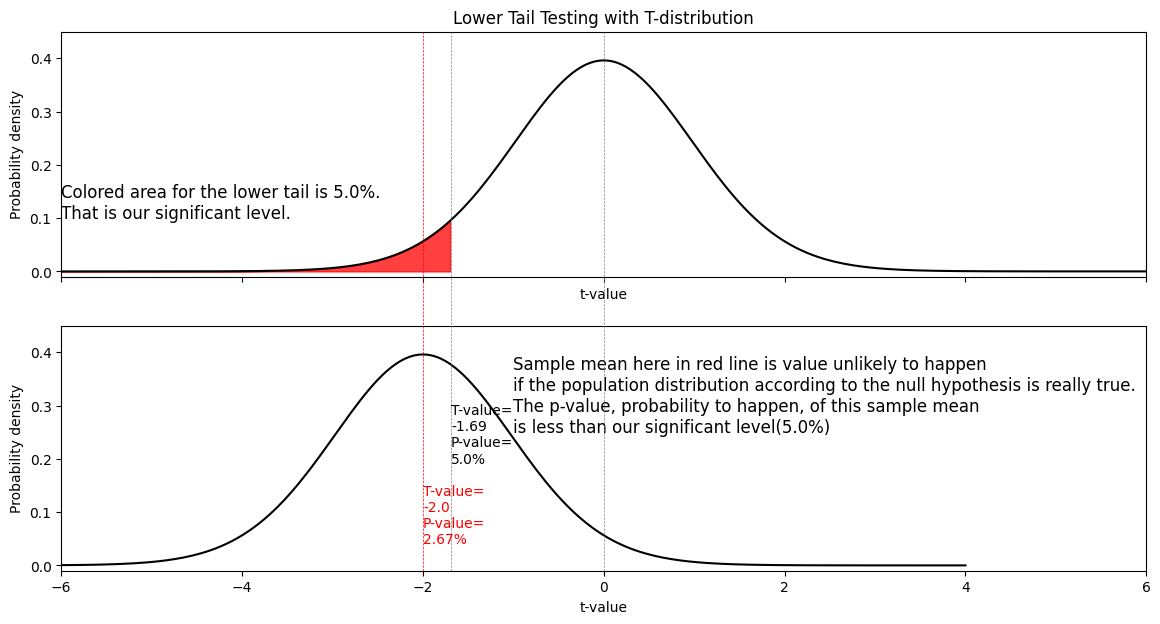

In [9]:
# Create your population distribution using t-distribution.

x = np.arange(-6, 6.01, 0.05) # Setting a x value range for the probability density plot
y = st.t.pdf(x, df=36) # Creating y values for the t-probability density plot

sx = np.arange(-6+ts, 6.01+ts,0.05)
sy = st.t.pdf(x, degf)
## General Setting for the Plot Grid
fig1, ax1 = plt.subplots(2, 1, figsize=(14, 7), sharex=True)
#plt.title("Area under the curve for $j_i$")

## Plot 2. One Tail Testing: Lower Tail
ax1[0].plot(x, y, color="black")
ax1[0].set_title("Lower Tail Testing with T-distribution")
ax1[0].set_ylim(-0.01, 0.45)
ax1[0].set_ylabel("Probability density")
ax1[0].set_xlabel("t-value")
ax1[0].fill_between(
    x=x,
    y1=y,
    where=(x <=t_ppf),
    color="red",
    alpha=0.75,
)
ax1[0].text(
    -6,
    0.1,
    f"Colored area for the lower tail is {sig*100}%. \nThat is our significant level.",
    fontsize=12,
)
#ax1[0].axvline(t_ppf, c='r', linestyle="--")

## Plot 2
ax1[1].plot(sx, sy, color="black")
ax1[1].set_ylim(-0.01, 0.45)
ax1[1].set_xlim(-6, 6)
ax1[1].set_ylabel("Probability density")
ax1[1].set_xlabel("t-value")
#ax.vlines(x=t, ymin=0, ymax=0.1, color="red", linestyle="--")
ax1[1].text(
    -1,
    0.25,
    f"Sample mean here in red line is value unlikely to happen \nif the population distribution according to the null hypothesis is really true.\nThe p-value, probability to happen, of this sample mean\nis less than our significant level(5.0%)",
    fontsize=12,
)

### Add vertical line across the plots
# background axes object for plotting the vertical line
ax =  fig1.add_subplot(sharex = ax1[1])
# set background color to transparent and turn off the frame
ax.patch.set_alpha(0)
ax.axis("off")
# plot the vertical line
ax.axvline(sx.mean(), c='r', linestyle="--", linewidth=0.5)
ax.axvline(0, c='grey', linestyle="--", linewidth=0.5)
ax.axvline(-abs(t_ppf), c='grey', linestyle="--", linewidth=0.5)
ax.text(ts,0.05,f"T-value=\n{round(-abs(ts),2)}\nP-value=\n{round(t_cdf*100,2)}%",c='r')
ax.text(-abs(t_ppf),0.2,f"T-value=\n{round(-abs(t_ppf),2)}\nP-value=\n{sig*100}%",c='black')